# Exploring Explainer Dashboards
## CHAPTER 09 - *Other popular XAI frameworks*

From **Applied Machine Learning Explainability Techniques** by [**Aditya Bhattacharya**](https://www.linkedin.com/in/aditya-bhattacharya-b59155b6/), published by **Packt**

### Objective

In this notebook, we will explore the application of Explainer Dashboards https://github.com/oegedijk/explainerdashboard for explaining ML models

### Installing the modules

Install the following libraries in Google Colab or your local environment, if not already installed.

In [ ]:
!pip install --upgrade pandas numpy matplotlib seaborn scikit-learn graphviz==0.18 explainerdashboard

### Loading the modules

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

from explainerdashboard import RegressionExplainer, ExplainerDashboard

import matplotlib.pyplot as plt
import seaborn as sns

from IPython import display

np.random.seed(123)

### About the data

**FIFA Club Position Prediction dataset - [FIFA Club Position Prediction dataset](https://github.com/PacktPublishing/Applied-Machine-Learning-Explainability-Techniques/tree/main/Chapter09/datasets/FIFA_Club_Position)**

In this tutorial we will use the FIFA Club Position Prediction dataset to predict the league position of the top football clubs playing in the top football leagues of the world. Please go through the data description to find out more.

### Loading the data

In [2]:
# We will read the training data
df_train = pd.read_csv('datasets/FIFA_Club_Position/fifa_league_21_train.csv')

In [3]:
df_train.head()

,short_name,overall,potential,value_eur,wage_eur,age,club_name,league_name,club_position,preferred_foot,weak_foot,skill_moves,international_reputation,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,rb,lcb,cb,rcb,gk,position
0,L. Messi,93,93,103500000.0,560000.0,33,FC Barcelona,Spain Primera Division,CAM,Left,4,4,5,85.0,92.0,91.0,95.0,38.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,32,35,24,6,11,15,14,8,NaN,92,92,92,92,93,93,93,92,93,93,93,93,90,90,90,93,69,68,68,68,69,65,65,55,55,55,22,3
1,Cristiano Ronaldo,92,92,63000000.0,220000.0,35,Juventus,Italian Serie A,LS,Right,4,5,5,89.0,93.0,81.0,89.0,35.0,77.0,84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,28,32,24,7,11,15,14,11,NaN,92,92,92,89,91,91,91,89,91,91,91,91,84,84,84,91,68,64,64,64,68,64,64,57,57,57,23,4
2,R. Lewandowski,91,91,111000000.0,240000.0,31,FC Bayern München,German 1. Bundesliga,ST,Right,4,4,4,78.0,91.0,78.0,85.0,43.0,82.0,71,94,85,84,89,85,79,85,70,88,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,35,42,19,15,6,12,8,10,NaN,91,91,91,85,87,87,87,85,88,88,88,86,82,82,82,86,67,68,68,68,67,64,64,63,63,63,22,1
3,Neymar Jr,91,91,132000000.0,270000.0,28,Paris Saint-Germain,French Ligue 1,LW,Right,5,5,5,91.0,85.0,86.0,94.0,36.0,59.0,85,87,62,87,87,95,88,89,81,95,94,89,96,91,83,80,62,81,50,84,51,36,87,90,92,93,35,30,29,9,9,15,15,11,NaN,87,87,87,90,89,89,89,90,91,91,91,91,86,86,86,91,70,65,65,65,70,65,65,52,52,52,23,2
4,K. De Bruyne,91,91,129000000.0,370000.0,29,Manchester City,English Premier League,RCM,Right,5,4,4,76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,92,77,76,78,91,76,91,63,89,74,91,76,66,88,94,84,91,68,65,53,15,13,5,10,13,NaN,86,86,86,88,88,88,88,88,91,91,91,91,91,91,91,91,82,83,83,83,82,78,78,72,72,72,24,1


In [4]:
# Reading the dataset description
with open('datasets/FIFA_Club_Position/data_description.txt') as f:
    contents = f.read()
    print(contents)

Fifa Club Position Prediction dataset.
--------------------------------------
The dataset is prepared from the Kaggle Fifa 22 Player dataset: https://www.kaggle.com/stefanoleone992/fifa-22-complete-player-dataset. Original dataset acknowledgement is provided to the website sofifa.com as the data is scrapped from the publicly available website.

The training data is for top 10 clubs for the 2020-21 season from English Premier League, La Liga, Serie A, Bundesliga 1, French League 1.

The test data is unlabeled and contains the player information of the same teams for 2021-2022 season.

The datasets contains the following features:

- Players available in FIFA 21, and also FIFA 22 for the selected clubs and leagues

- 80+ attributes

- The club `position` is the target variable that the model needs to predict.

- Player positions, with the role in the club

- Player attributes with statistics as Attacking, Skills, Defense, Mentality, GK Skills, etc.

- Player ratings out of 100 in differe

In [5]:
# Check dataset dimensions
print(df_train.shape)

(1584, 82)


In [6]:
df_train.columns

Index(['short_name', 'overall', 'potential', 'value_eur', 'wage_eur', 'age',
       'club_name', 'league_name', 'club_position', 'preferred_foot',
       'weak_foot', 'skill_moves', 'international_reputation', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1584 entries, 0 to 1583
Data columns (total 82 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   short_name                   1584 non-null   object 
 1   overall                      1584 non-null   int64  
 2   potential                    1584 non-null   int64  
 3   value_eur                    1583 non-null   float64
 4   wage_eur                     1584 non-null   float64
 5   age                          1584 non-null   int64  
 6   club_name                    1584 non-null   object 
 7   league_name                  1584 non-null   object 
 8   club_position                1584 non-null   object 
 9   preferred_foot               1584 non-null   object 
 10  weak_foot                    1584 non-null   int64  
 11  skill_moves                  1584 non-null   int64  
 12  international_reputation     1584 non-null   int64  
 13  pace              

As we can see, the dataset contains close to 81 features, out of which input values like the name of the player, name of the club, name of the league and preferred foot might not be helpful to decide the team's position in the next season. The basic intuition is that the team's position is decided by the quality of the players and strength of the players in different playing positions. So, the player's playing position can be an important feature, as it also gives some indication about the depth of the squad in terms of reserves and substitutes, which can be a deciding factor for predicting the club's position. Let's do some data preprocessing based on this intuitions.

### Data Pre-processing

In [8]:
# Drop un-necessary features
features_to_drop = ['short_name', 'club_name', 'league_name', 'preferred_foot']

In [9]:
df_train.drop(columns=features_to_drop, inplace=True)

In [10]:
print(df_train.shape)

(1584, 78)


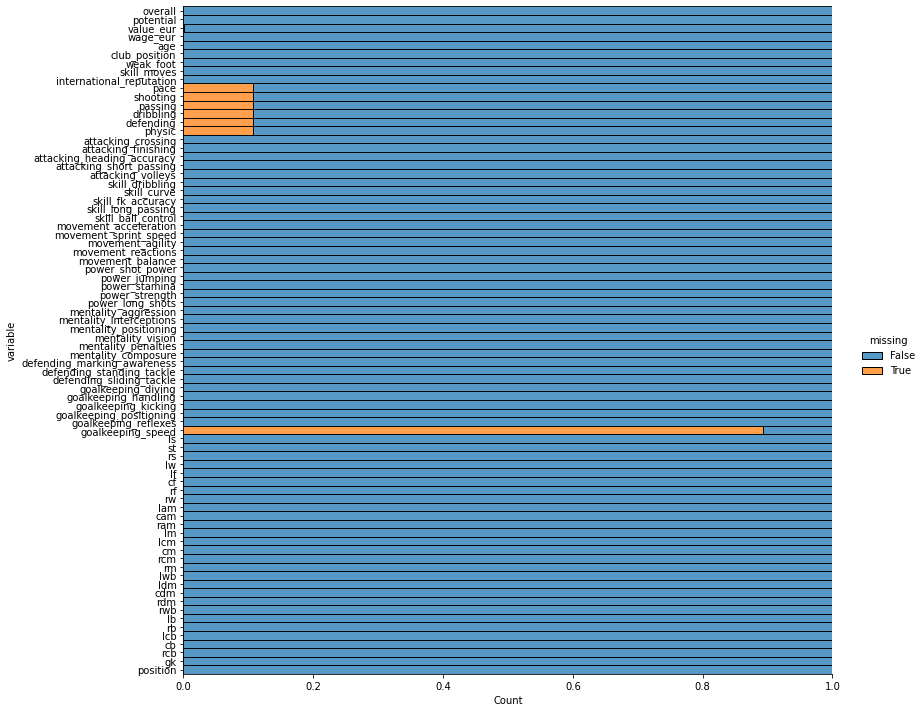

In [11]:
# Let's check missing values

sns.displot(
    data=df_train.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    height=10,
    aspect=1.2
)
plt.show()

As we analyze the missing values, we can see that goalkeeping speed has high percentage of missing values. Hence we can also drop the feature. But for the other missing values related to pace, shooting, passing, dribbling, defending and physic, mostly this data is not available for goal keepers. So, instead of dropping the records related to goal keepers, we will keep a constant value of 40 for all the goal keepers, as the intuitively thinking since these goal keepers are professional players, almost all of them would have a score of atleast 40. There is one missing value under value_eur. It is highly possible that the player has decided to retire and hence no value is assigned. So, we will just drop this record as an outlier.

In [12]:
# dropping the feature 'goalkeeping_speed'
df_train.drop(columns=['goalkeeping_speed'], inplace=True)

In [13]:
# data imputation for the features 'pace', 'shooting', 'passing', 'dribbling', 'defending' and 'physic' with a constant value of 40
for features in ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']:
    df_train[features].fillna(40, inplace=True)

In [14]:
# Consider all other missing values as outliers, so just drop them
df_train.dropna(inplace=True)

In [15]:
# Let's separate the labels from training data
labels = df_train['position']
df_train.drop(columns=['position'], inplace=True)

In [16]:
print(df_train.shape)

(1583, 76)


Next, for the feature `club_position` which indicates the playing position of the player for the club, we will keep this feature, but since it is a categorical feature, we will apply one-hot encoding. Let's first check the count of the possible playing positions.

In [17]:
len(df_train['club_position'].value_counts())

29

In [96]:
# One-Hot Encoding
def encode_features(df, features):
    '''
    Method for one-hot encoding all selected categorical fields
    '''
    for f in features:
        if(f in df.columns):
            encoded = pd.get_dummies(df[f])
            encoded = encoded.add_prefix(f + '_')
            df = pd.concat([df, encoded], axis=1)
        else:
            #print('Feature not found')
            return df
        
    df.drop(columns=features, inplace = True)
    
    return df

encoded_train = encode_features(df_train, features = ['club_position'])
encoded_train.shape

(1583, 104)

In [19]:
encoded_train.head()

,overall,potential,value_eur,wage_eur,age,weak_foot,skill_moves,international_reputation,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,rb,lcb,cb,rcb,gk,club_position_CAM,club_position_CB,club_position_CDM,club_position_CF,club_position_CM,club_position_GK,club_position_LAM,club_position_LB,club_position_LCB,club_position_LCM,club_position_LDM,club_position_LF,club_position_LM,club_position_LS,club_position_LW,club_position_LWB,club_position_RAM,club_position_RB,club_position_RCB,club_position_RCM,club_position_RDM,club_position_RES,club_position_RF,club_position_RM,club_position_RS,club_position_RW,club_position_RWB,club_position_ST,club_position_SUB
0,93,93,103500000.0,560000.0,33,4,4,5,85.0,92.0,91.0,95.0,38.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,32,35,24,6,11,15,14,8,92,92,92,92,93,93,93,92,93,93,93,93,90,90,90,93,69,68,68,68,69,65,65,55,55,55,22,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,92,92,63000000.0,220000.0,35,4,5,5,89.0,93.0,81.0,89.0,35.0,77.0,84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,28,32,24,7,11,15,14,11,92,92,92,89,91,91,91,89,91,91,91,91,84,84,84,91,68,64,64,64,68,64,64,57,57,57,23,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,91,91,111000000.0,240000.0,31,4,4,4,78.0,91.0,78.0,85.0,43.0,82.0,71,94,85,84,89,85,79,85,70,88,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,35,42,19,15,6,12,8,10,91,91,91,85,87,87,87,85,88,88,88,86,82,82,82,86,67,68,68,68,67,64,64,63,63,63,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,91,91,132000000.0,270000.0,28,5,5,5,91.0,85.0,86.0,94.0,36.0,59.0,85,87,62,87,87,95,88,89,81,95,94,89,96,91,83,80,62,81,50,84,51,36,87,90,92,93,35,30,29,9,9,15,15,11,87,87,87,90,89,89,89,90,91,91,91,91,86,86,86,91,70,65,65,65,70,65,65,52,52,52,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,91,91,129000000.0,370000.0,29,5,4,4,76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,92,77,76,78,91,76,91,63,89,74,91,76,66,88,94,84,91,68,65,53,15,13,5,10,13,86,86,86,88,88,88,88,88,91,91,91,91,91,91,91,91,82,83,83,83,82,78,78,72,72,72,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


Now, we have 104 features in total, which is actually alot! Also, data scaling and normalization definitely would have helped to get a better model, but we will avoid that, as like other exercises covered in previous chapters, the goal is to come up with a model explainability method and not with an highly accurate model! If you want to improve model accuracy, my suggestions will be to first select the important features and then train with only the important features. Also, instead of picking all players for each team, you can just select top 15-20 players as mostly they will be part of the playing 11. But we will not focus on getting better model results, we will focus on explaining any model (be it good or bad)! Let's proceed with training the model.

### Training the model

Currently, ExplainerDashboard only supports scikit-learn compatible models. So, for this example we will use Random Forest Regression algorithm. Please note that we are treating this problem as a regression problem rather than a classification problem as predicting club positions with high accuracy is practically not very feasible. Instead, if we consider this as a regression problem, we can measure the mean absolute error or deviation from the actuals to tune the model further.  

In [20]:
x_train,x_valid,y_train,y_valid = train_test_split(encoded_train,labels,test_size=0.2,random_state=123)

In [84]:
model_skl = RandomForestRegressor(n_estimators=260, random_state=123).fit(x_train, y_train)

In [85]:
y_pred = model_skl.predict(x_valid)
print('Mean absolute error is:')
mean_absolute_error(y_valid, y_pred)

Mean absolute error is:


2.0400630914826494

### Model evaluation on unseen data

In [90]:
df_test = pd.read_csv('datasets/FIFA_Club_Position/fifa_league_22_test.csv')

def predict_club_position(df_test, model, club_name, num_player = 10):
    '''
    Predict club position from player quality
    '''
    df_test = encode_features(df_test, features = ['club_position'])
    df_test = df_test[df_test['club_name'] == club_name].head(num_player)
    # display.display(df_test)
    df_test.drop(columns=features_to_drop, inplace=True)
    df_test.drop(columns=['goalkeeping_speed'], inplace=True)
    for features in ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']:
            df_test[features].fillna(40, inplace=True)
    
    out_position = model.predict(df_test)
    return np.median(out_position)

In [91]:
position = predict_club_position(df_test, model_skl, club_name = 'Manchester United', num_player = 10)
print(f"Predicted position is: {round(position)}")

Predicted position is: 3


In [101]:
# Now let's get top clubs from every league according to our model for 2021-2022 season

def get_top_clubs(df_test, model, num_player = 15):
    '''
    Get top clubs across all leagues available in the dataset
    '''
    all_leagues = list(df_test['league_name'].unique())
    for league in all_leagues:
        df_test = encode_features(df_test, features = ['club_position'])
        df = df_test[df_test['league_name'] == league]
        all_clubs = list(df['club_name'].unique())
        club_pos_list = []
        for club in all_clubs:
            predicted_pos = predict_club_position(df, model, club_name = club, num_player = num_player)
            club_pos_list.append((club, predicted_pos))
        club_pos_df = pd.DataFrame(club_pos_list, columns = ['Club', 'Position'])
        club_pos_df['Position'] = club_pos_df['Position'].rank(method='first')
        club_pos_df = club_pos_df.sort_values(by=['Position'])
        print('---------------------------------------------------------------')
        print(f'Predicted positions for {league}')
        print('---------------------------------------------------------------')
        display.display(club_pos_df)

In [102]:
get_top_clubs(df_test, model_skl)

---------------------------------------------------------------
Predicted positions for French Ligue 1
---------------------------------------------------------------


,Club,Position
0,Paris Saint-Germain,1.0
1,AS Monaco,2.0
3,LOSC Lille,3.0
2,Olympique Lyonnais,4.0
4,Olympique de Marseille,5.0
7,Stade Rennais FC,6.0
5,OGC Nice,7.0
9,Racing Club de Lens,8.0
6,Montpellier Hérault SC,9.0
8,FC Metz,10.0


---------------------------------------------------------------
Predicted positions for German 1. Bundesliga
---------------------------------------------------------------


,Club,Position
0,FC Bayern München,1.0
4,RB Leipzig,2.0
1,Borussia Dortmund,3.0
2,VfL Wolfsburg,4.0
6,Bayer 04 Leverkusen,5.0
5,Eintracht Frankfurt,6.0
3,Borussia Mönchengladbach,7.0
7,1. FC Union Berlin,8.0
9,VfB Stuttgart,9.0
8,Sport-Club Freiburg,10.0


---------------------------------------------------------------
Predicted positions for English Premier League
---------------------------------------------------------------


,Club,Position
1,Manchester City,1.0
4,Liverpool,2.0
0,Manchester United,3.0
3,Chelsea,4.0
2,Tottenham Hotspur,5.0
5,Leicester City,6.0
8,West Ham United,7.0
9,Leeds United,8.0
6,Arsenal,9.0
7,Everton,10.0


---------------------------------------------------------------
Predicted positions for Spain Primera Division
---------------------------------------------------------------


,Club,Position
2,Real Madrid CF,1.0
0,Atlético de Madrid,2.0
1,FC Barcelona,3.0
4,Sevilla FC,4.0
5,Real Sociedad,5.0
3,Villarreal CF,6.0
7,Real Betis Balompié,7.0
8,Athletic Club de Bilbao,8.0
9,Granada CF,9.0
6,RC Celta de Vigo,10.0


---------------------------------------------------------------
Predicted positions for Italian Serie A
---------------------------------------------------------------


,Club,Position
2,Inter,1.0
0,Juventus,2.0
5,Atalanta,3.0
4,AC Milan,4.0
6,Roma,5.0
3,Napoli,6.0
1,Lazio,7.0
7,U.S. Sassuolo Calcio,8.0
9,Hellas Verona,9.0
8,U.C. Sampdoria,10.0


So, based on the data about the quality of players, the best AutoML model has predicted the club position for the top football leagues of the world. In the real world setting, obviously there are much more variable that needs to be considered, but I think the results from the model is pretty reasonable. Now, let's use explainer dashboard to explain the model results.

### Model Explainability using Explainer Dashboards

Although explainerdashboards are quite easy to use, but I will recommend, you to go through the documentations https://explainerdashboard.readthedocs.io/en/latest/ to even customize your own explainerdashboard!

In [ ]:
explainer = RegressionExplainer(model_skl, x_valid, y_valid)

ExplainerDashboard(explainer).run()

Open your Explainerdashboard at http://localhost:8050/ site in the browser and play around to gain more insights! You can interrupt the kernel to stop the dashboard.

## Final Thoughts

The explainability which explainer dashboard provides is very robust and tries to cover a broad range of model explainability methods like SHAP values, feature importance, model performance, decision tree graphs, what-if scenarios! The best part I like is the interactions offered by the dashboard, which truely makes it easier to analyze a particular prediction! I would recommend you to go through the chapter to find out more about the components!

## Reference

1. Dataset link - [FIFA Club Position Prediction Dataset](https://github.com/PacktPublishing/Applied-Machine-Learning-Explainability-Techniques/tree/main/Chapter09/datasets/FIFA_Club_Position)
2. Explainerdashboard Github project - https://github.com/oegedijk/explainerdashboard
3. Explainerdashboard Documentation -https://explainerdashboard.readthedocs.io/en/latest/
4. Other notebook examples: https://github.com/oegedijk/explainerdashboard/tree/master/notebooks
5. Some of the utility functions and code are taken from the GitHub Repository of the author - Aditya Bhattacharya https://github.com/adib0073
6. Want to connect with the author of this chapter? You can reach out by any means mentioned here: https://aditya-bhattacharya.net/contact-me/